In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('data').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [3]:
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df
x=df[['input']].values
y=df[['output']].values

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train1=scaler.transform(x_train)

In [13]:
ai_brain = Sequential([
    Dense(6,activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(x_train1,y_train,epochs  = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 465ms/step - loss: 3293.6394
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 3292.3347
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 3291.3716
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 3290.5576
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 3289.8293
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 3289.1567
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 3288.5239
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 3287.9207
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 3287.3396
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 3286.7759
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 3286.2266
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 3285.6887
Epoch 13

NIVETHA.K 212222230102


<Axes: >

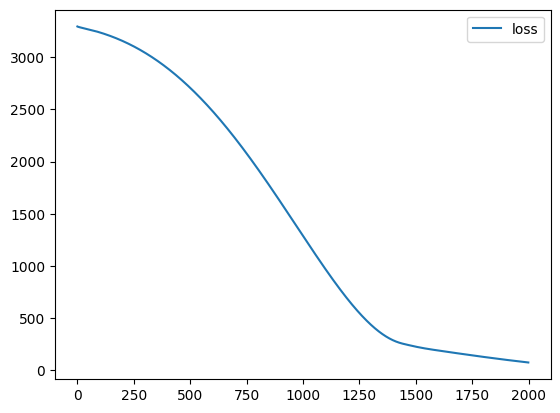

In [14]:
print("NIVETHA.K 212222230102")
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [15]:
x_test1 = scaler.transform(x_test)
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 84.9962


84.99617004394531

In [16]:
x_n1 = [[5]]
x_n1_1 = scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 51ms/step


array([[36.305546]], dtype=float32)